In [1]:
#导入模块
import os
import urllib
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.utils import shuffle

%matplotlib inline

# 1、数据预处理

In [2]:
url_train = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/5441/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1513750312&Signature=Ubqo2VusO%2FMKiMdoWJytkHwuBi4gG0i%2F0HbXMuJHgz0CqFHZG%2FlM1%2BM3uJ%2Br8RYta4azbsNvKXm4E7k4m2kfuw1juZtzaSTsdJ8GYIM3CuSKyRnFiAidiMGLNy9nHMOhfbDMaOi%2F55uLbcnBcVrhhjwWGv4g4PZqGaSLUX2g7WZb3xcQzI%2BJCskpEgA%2BjY%2FYspaG4yKT%2ByGjMTjsV2br%2Bb83AmbQDD802i5Ng24%2ByDHXTKS5bVjKAE9rYP%2FQZNrefLDaWxpzd3lgqg3X3wuy0ER9MoS6kSKNZfpbQ6IVoRcp6PZ2MrGAtlvSjoZRodkzWX9sT1ip%2B4yxB4yhDS4urQ%3D%3D'
url_test = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/5441/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1513750320&Signature=qoc1ZpqTtGDESX8O047XBFpcxVrFKVFWDFmdclXIxlZ3rkAaIzpsVMHHbxT5k%2FQlHREs5QWIVnekip3lsL6p%2FHy3wRa%2B39M3e10NyAb7DcJfKyAXAPT2aFp2qU4xDnywriP9NBLYs1xqBch6lidcP9OycrV9QxzWsvF4U4r06Vosi9UhPZ6p8eXOPJUkjBxYGkLc2vD%2F2He2UBkVHOCxVlwMf6aOW4T2XWq%2BM4hnQ7lhKr7g5joAhclx0ZxUudFf3UoJ2eOx3jD1rjNIqPhPRX0eOL99%2BIwX%2Bl7tnGszMT901yVBIuV0gz%2FTrUgkchZv7N6jp5WmALcXP15jYWIPyQ%3D%3D'

train_path = "train.zip"
test_path = "test.zip"

def Download_data(url,path):
    s = requests.Session()
    file = s.get(url)
    with open(path,'wb') as code:
        code.write(file.content)
    
Download_data(url_train,train_path)
Download_data(url_test,test_path)

#解压代码
def Un_zip(file_name):  
    """unzip zip file"""  
    zip_file = zipfile.ZipFile(file_name)  
    for names in zip_file.namelist():  
        zip_file.extract(names)  
    zip_file.close() 

Un_zip(train_path)
Un_zip(test_path)

'url_train = \'https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/train.zip\'\nurl_test = \'https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/test.zip\'\n\ntrain_path = "train.zip"\ntest_path = "test.zip"\n\nurllib.urlretrieve(url_train, train_path)\nurllib.urlretrieve(url_test, test_path)\n\n#解压代码\ndef un_zip(file_name):  \n    """unzip zip file"""  \n    zip_file = zipfile.ZipFile(file_name)  \n    if os.path.isdir(file_name + "_files"):  \n        pass  \n    else:  \n        os.mkdir(file_name + "_files")  \n    for names in zip_file.namelist():  \n        zip_file.extract(names,file_name + "_files/")  \n    zip_file.close() \n\nun_zip(train_path)\nun_zip(test_path)'

In [2]:
#将训练图片分类
path = "train"
files = os.listdir(path)
cats = []
dogs = []
for file in files:
    if file[:3] == "cat":
        cats.append(path+"/"+file)
    else:
        dogs.append(path+"/"+file)

In [3]:
path = "test"
files = os.listdir(path)
tests = []
for file in files:
    tests.append(path+"/"+file)

In [4]:
cats_num = len(cats)
dogs_num = len(dogs)
print("猫咪有"+str(cats_num)+"只")
print("狗狗有"+str(dogs_num)+"只")

猫咪有12500只
狗狗有12500只


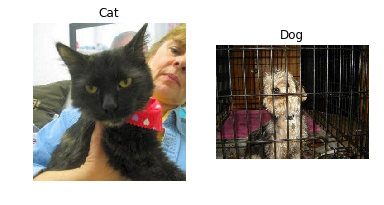

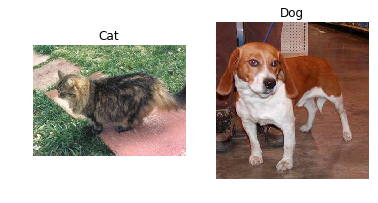

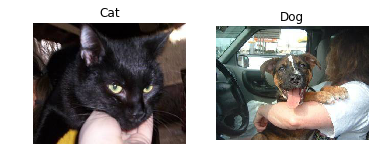

In [5]:
#显示猫和狗的图像
for show in range(3):
    image_cat = mpimg.imread(cats[np.random.randint(0,cats_num)])
    image_dog = mpimg.imread(dogs[np.random.randint(0,dogs_num)])

    plt.subplot(1,2,1)
    plt.title('Cat')
    plt.imshow(image_cat)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Dog')
    plt.imshow(image_dog)
    plt.axis('off')
    plt.show()

In [6]:
#设置标签
labels = [0]*cats_num
labels.extend([1]*dogs_num)
labels = np.array(labels)
y = np.zeros((labels.shape[0],2))
y[np.arange(labels.shape[0]),labels] = 1

In [8]:
pets = np.hstack((cats,dogs))
pets,y = shuffle(pets,y)

In [9]:
#统一图片大小
def im_resize(pets,X):
    for pet in pets:
        img = Image.open(pet)
        arr = np.asarray(img,dtype="float32")
        arr.resize((299,299))
        X.append(np.array(arr))
        
X = []
im_resize(pets,X)
X = np.asarray(X,'f')

test = []
im_resize(tests,test)
test = np.asarray(test,'f')

TypeError: float() argument must be a string or a number, not 'JpegImageFile'

In [ ]:
#像素归一化
def batch_Normalized(data,batch=2500):
    for offset in range(0,len(data),batch):
        end = offset + batch
        data[offset:end] = (data[offset:end] - 128.0) / 128.0
    
batch_Normalized(X)
batch_Normalized(test)

In [ ]:
split = len(X)*0.8
X_train, y_train = X[:split],y[:split]
X_val, y_val = X[split:],y[split:]

# 2、搭建神经网络#

In [ ]:
def Conv2d(x_tensor,conv_outputs,conv_ksize,conv_strides,padding='VALID'):
    weight = tf.Variabel(tf.truncated_normal([conv_ksize[0],conv_ksize[1],
                                              x_tensor.get_shape().as_list()[3],
                                              conv_outputs],stddev=0.01))
    bias = tf.Variable(tf.zeros([conv_outputs]))
    padding = padding
    
    conv2d = tf.nn.conv2d(x_tensor,weight,
                          strides=[1,conv_strides[0],conv_strides[1],1],
                         padding=padding)
    conv2d = tf.nn.bias_add(conv2d,bias)
    conv2d = tf.nn.relu(conv2d)
    
    return conv2d

In [ ]:
def Max_pool(x_tensor,pool_ksize,pool_strides,padding='VALID'):
    max_pool = tf.nn.max_pool(x_tensor,
                              ksize=[1,pool_ksize[0],pool_ksize[1],1],
                              strides=[1,pool_strides[0],pool_strides[1],1]
                            padding=padding)
    return max_pool

In [ ]:
def Avg_pool(x_tensor,pool_ksize,pool_strides,padding='VALID'):
    avg_pool = tf.nn.avg_pool(x_tensor,
                              ksize=[1,pool_ksize[0],pool_ksize[1],1],
                              strides=[1,pool_strides[0],pool_strides[1],1]
                            padding=padding)
    return avg_pool

In [ ]:
def Inception(x_tensor,branch_output,padding='SAME'):
    branch_0 = Conv2d(net,branch_output[0],[1,1],[1,1],padding=padding)

    branch_1 = Conv2d(net,branch_output[1],[1,1],[1,1],padding=padding)
    branch_1 = Conv2d(branch_1,branch_output[2],[3,3],[1,1],padding=padding)

    branch_2 = Conv2d(net,branch_output[3],[1,1],[1,1],padding=padding)
    branch_2 = Conv2d(branch_2,branch_output[4],[5,5],[1,1],padding=padding)

    branch_3 = Max_pool2d(net,[3,3],[1,1])
    branch_3 = Conv2d(branch_3,branch_output[5],[1,1],[1,1],padding=padding)
        
    net = tf.concat([branch_0,branch_1,branch_2,branch_3],3)
                    

In [ ]:

def flatten(x_tensor):
    flatten = tf.contrib.layers.flatten(x_tensor)
    
    return flatten

In [ ]:
def fully_conn(x_tensor, num_outputs):
    x_shape = x_tensor.get_shape().as_list()
    weights = tf.Variable(tf.truncated_normal([x_shape[1],num_outputs],stddev=0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    #全连接层
    fc1 = tf.reshape(x_tensor, [-1, weights.get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1,weights),bias)
    fc1 = tf.nn.relu(fc1)
    
    return fc1

In [ ]:
def output(x_tensor, num_outputs):
    #参数：x_shape，weight,bias
    x_shape = x_tensor.get_shape().as_list()
    weight = tf.Variable(tf.truncated_normal([x_shape[1],num_outputs],stddev=0.1))
    bias = tf.Variable(tf.zeros([num_outputs]))
    #输出层
    output = tf.add(tf.matmul(x_tensor,weight),bias)
    
    return output

In [ ]:
def conv_net(x, keep_prob):
    net = Conv2d(x,32,(3,3),(2,2))
    net = Conv2d(net,32,(3,3),(1,1))
    net = Conv2d(net,64,(3,3),(1,1),padding='SAME')
    
    net = Maxpool(net,[3,3],[2,2])
    
    net = Conv2d(net,80,(3,3),(1,1))
    net = Conv2d(net,192,(3,3),(2,2))
    net = Conv2d(net,288,(3,3),(1,1),padding='SAME')
    
    net = Inception(net,[64,48,64,64,96,32])
    net = Inception(net,[64,48,64,64,96,64])
    net = Inception(net,[64,48,64,64,96,64])
    
    net = Maxpool(net,[3,3],[2,2])
    
    net = Inception(net,[192,160,192,160,192,192])    
    net = Inception(net,[192,160,192,160,192,192])    
    net = Inception(net,[192,160,192,160,192,192])
    
    net = Maxpool(net,[3,3],[2,2])
    
    net = Inception(net,[512,384,512,384,512,512])
    net = Inception(net,[512,384,512,384,512,512])
    net = Inception(net,[512,384,512,384,512,512])
    
    net = Avg_pool(net,[8,8],[1,1])
    net = tf.nn.dropout(net,keep_prob)
    
    logits = Conv2d(net,1000,(1,1),(1,1))
    logits = tf.squeeze(logits,[1,2])
    logits = tf.nn.softmax(logits)
    
    return logits

In [49]:
image_shape = X_train[0].shape
n_class = np.unique(y_train).size
x = tf.placeholder(tf.float32,[None,image_shape[0],image_shape[1],image_shape[2]],name="x")
y = tf.placeholder(tf.float32,[None,n_class],name="y")
keep_prob = tf.placeholder(tf.float32,name="keep_prob")

logits,end_points = conv_net(x)
logits = tf.identity(logits,name="logits")

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# 3、训练神经网络#

In [39]:
epochs = 10
batch_size = 64
keep_probability = 0.5

In [43]:
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    
    for epoch in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, len(X_train), batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer,feed_dict={x:batch_x,y:batch_y,keep_prob:keep_probability})
              
        print('Epoch {:>2} :  '.format(epoch + 1),end="")
        loss = sess.run(cost,feed_dict={x:batch_x,y:batch_y,keep_prob:1.})
        valid_acc = sess.run(accuracy,feed_dict={x:X_val,y:y_val,keep_prob:1.})
        print('Loss: {:>10.4f} Valadation: {:.6f}'.format(loss,valid_acc))
    
    saver.save(sess, './google_net')
    print("Model saved")

Training...

Epoch  1 :  Loss:     0.6171 Valadation: 0.649600


KeyboardInterrupt: 

# 4、测试模型#

In [ ]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))

Logits,End_points = inception_v3(x)
prediction_labels = tf.argmax(Logits,1)
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess,'./google_net')
    MyLogits = sess.run(Loghts,feed_dict = {x:test})
    prediction = sessrun(prediction_labels,feed_dict = {Loghts:MyLogits})
    
for show in range(5):
    i = np.random.randint(0,len(test))
    image_pet = mpimg.imread(tests[i])
    plt.title("It is : {0}".format(prediction[i]))
    plt.imshow(image_pet)

In [15]:
import csv

filename = 'cat_vs_dog.csv'
try:
    csvfile = open(filename,'w')
    writer = csv.writer(csvfile)
    writer.writerow(['id','label'])
    csv_data=[(x,y) for x,y in zip(range(1,len(prediction)+1),prediction)]
    writer.writerows(csv_data)
finally:
    csvfile.close()